In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/quora-qn-pairs/train.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.is_duplicate.value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

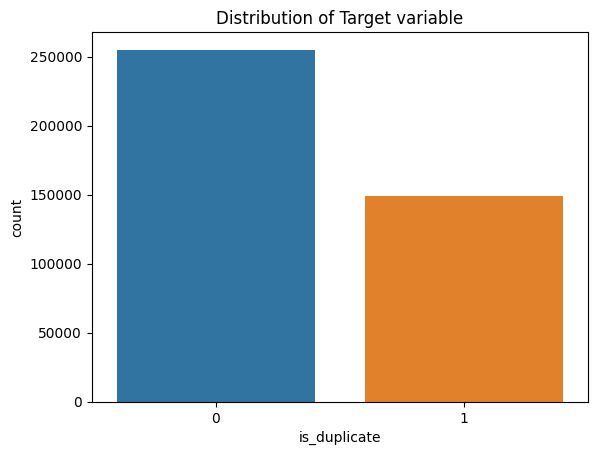

In [6]:
sns.countplot(x=df['is_duplicate'])
plt.title("Distribution of Target variable")
plt.show()

In [7]:
question_ids=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
no_of_unique_ques=question_ids.nunique()


print("Total number of Unique Questions is",no_of_unique_ques)


Total number of Unique Questions is 537933


In [8]:
count_df=question_ids.value_counts()

print("total number of question occuring more than once is",(count_df>1).sum())

total number of question occuring more than once is 111780


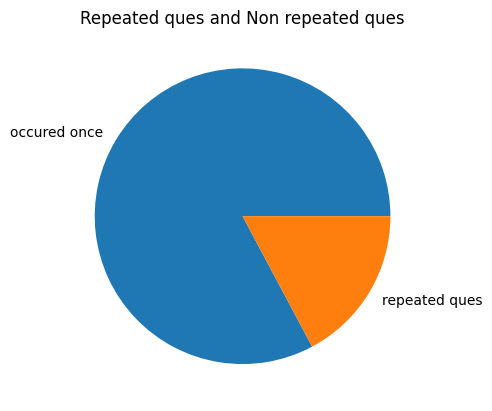

In [9]:
plt.pie([no_of_unique_ques,(count_df>1).sum()],labels=['occured once','repeated ques'])
plt.title("Repeated ques and Non repeated ques")
plt.show()

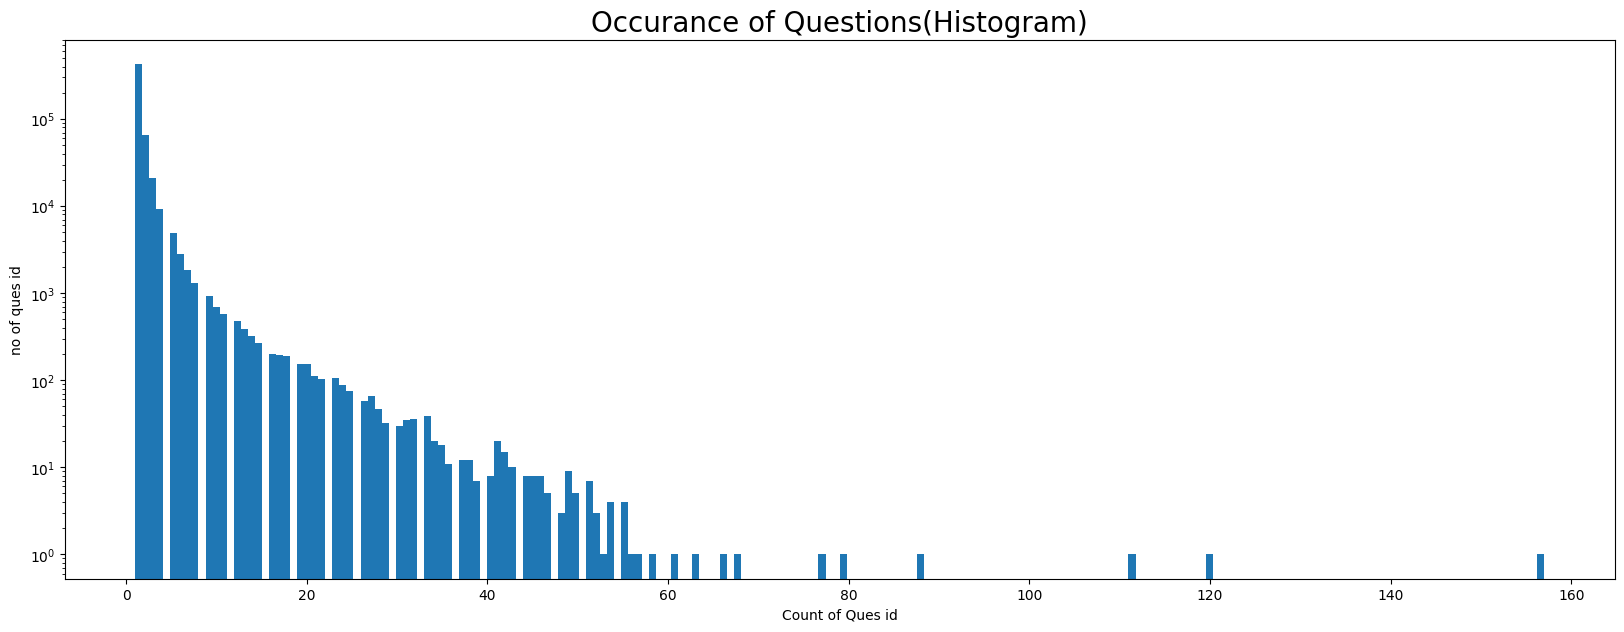

In [10]:
plt.figure(figsize=(20,7))
plt.hist(count_df,bins=200)
plt.yscale("log")
plt.title("Occurance of Questions(Histogram)",size=20)
plt.xlabel("Count of Ques id")
plt.ylabel("no of ques id")
plt.show()

In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

## Basic feature Engineering

In this section We will create some basic feature which are :-
- **`freq_qid1`**- the number of times question 1 is occured in dataset
- **`freq-qid2`**- the number of times question 2 is occured in dataset
- **`q1len`**- length of question 1
- **`q2len2`**-length of question 2
- **`q1_n_words`**- number of words in question 1
- **`q2_n_words`**- number of words in question 2
- **`words common`**- number of words common in question1 and question2
- **`total_words`**- total number of words in both questions
- **`words_share`**- ratio of common words to total words


In [8]:
df['freq_qid1']=df.groupby('qid1')['qid1'].transform('count')
df['freq_qid2']=df.groupby('qid2')['qid2'].transform('count')
df['q1len']=df['question1'].str.len()
df['q2len']=df['question2'].str.len()
df['q1_n_words']=df['question1'].apply(lambda x:len(x.split(" ")))
df['q2_n_words']=df['question2'].apply(lambda x:len(x.split(" ")))




In [9]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7


In [10]:
def words_common(row1,row2):
    a=set(row1.split(" "))
    b=set(row2.split(" "))
    return len(a&b)

def total_words(row1,row2):
    a=set(row1.split(" "))
    b=set(row2.split(" "))
    return len(a)+len(b)

df['words_common']=df.apply(lambda x:words_common(x['question1'],x['question2']),axis=1)
df['words_total']=df.apply(lambda x:total_words(x['question1'],x['question2']),axis=1)
df['words_share']=df.words_common/df.words_total

In [11]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,words_common,words_total,words_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,3,24,0.125000
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,19,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000


## Visualizing extracted features

**In this section we will visualize whether a classifying power of features which we created and also we will check distribution of feature**

**`Words share`**

<ipython-input-17-5f7dd0dfe09f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.is_duplicate==0]['words_share'],label=0,color='red')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-17-5f7dd0dfe09f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an ax

<Axes: xlabel='words_share', ylabel='Density'>

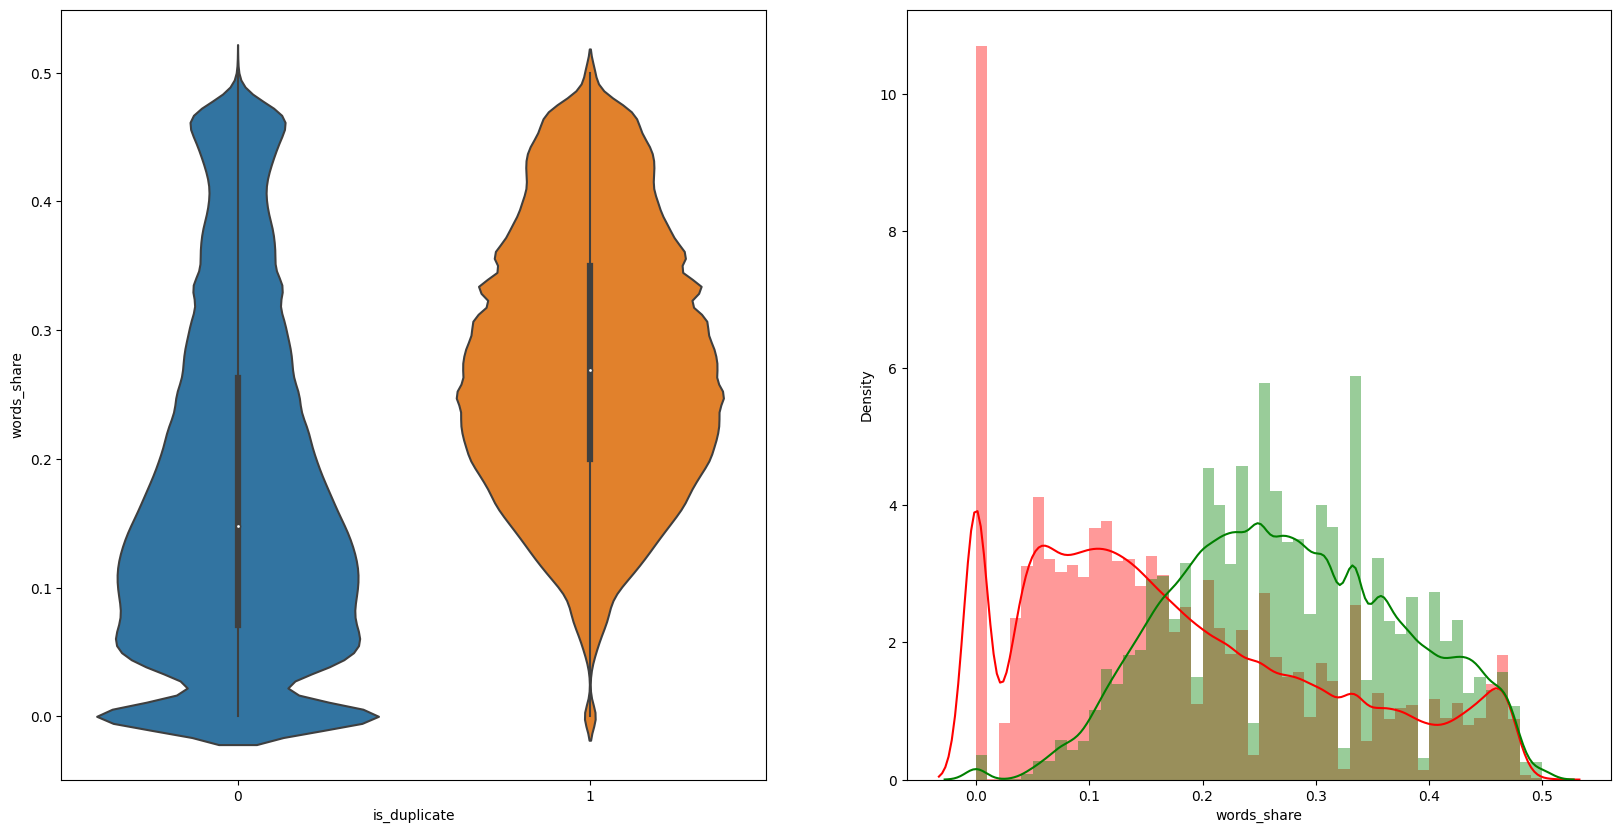

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.violinplot(x=df.is_duplicate,y='words_share',data=df)
plt.subplot(1,2,2)
sns.distplot(df[df.is_duplicate==0]['words_share'],label=0,color='red')
sns.distplot(df[df.is_duplicate==1]['words_share'],label=1,color='green')


**`Words common`**

<ipython-input-18-cb9239f2b988>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.is_duplicate==0]['words_common'],label=0,color='red')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-18-cb9239f2b988>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an a

<Axes: xlabel='words_common', ylabel='Density'>

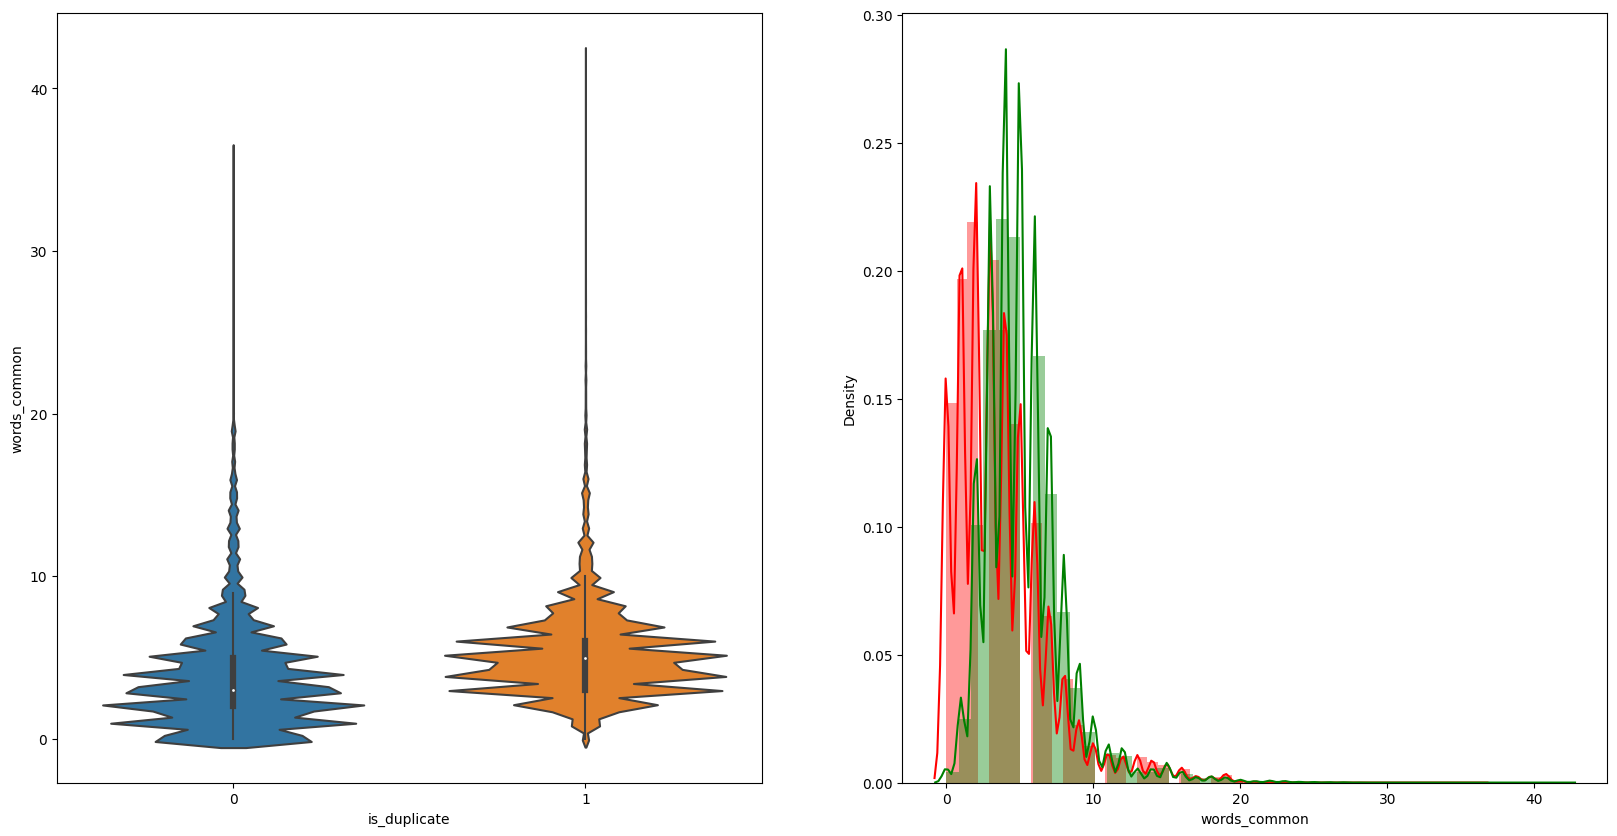

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.violinplot(x=df.is_duplicate,y='words_common',data=df)
plt.subplot(1,2,2)
sns.distplot(df[df.is_duplicate==0]['words_common'],label=0,color='red')
sns.distplot(df[df.is_duplicate==1]['words_common'],label=1,color='green')

# Advance Feature Engineering and Text preprocessing

In the Text preprocessing part,it consists of cleaning the text(expanding contracted words, removing punctuation and links)

and in the feature engineering part we will perform tokenization,stemming,and we will also remove stopwords later.

**`Tokenization`**-It means breaking the whole text into small parts.it is of two types word tokenization(breaking sentences into words) and sentence tokenization(breaking long text into sentences).

**`stemming`**-stemming means getting the words in their base form.for examles if we use the word 'follow' can have different form such as 'follows',  'following' , 'followed' so in stemming we will reduced all these words to  its base form which is 'follow'



In [12]:
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

In [13]:
#defining a function to expand contracted words
def contract_expand(text):
    new_text=""
    text=text.lower()
    for word in text.split():
        if word in CONTRACTION_MAP.keys():
            new_text=new_text+CONTRACTION_MAP[word]
            new_text=new_text+" "
        else:
            new_text=new_text+word
            new_text=new_text+" "
    return new_text

In [14]:
#checking our function
sample_text="I dON't eat banana"
contract_expand(sample_text)

'i do not eat banana '

**Now we will apply this function to our dataset for qustion1 and question2**

In [15]:
df['question1']=df.question1.apply(contract_expand)
df['question2']=df.question2.apply(contract_expand)

**Removing punctuation**

In [16]:
#defining function
def remove_punctuation_and_links(text):
    pattern1=re.compile('https?\S+|www.\S+|#[a-zA-Z0-9]+')
    text=re.sub(pattern1,"",text)
    pattern2="[^\w\s]"

    return re.sub(pattern2,"",text)


In [17]:
import warnings
warnings.filterwarnings("ignore")

from matplotlib import style
style.use("ggplot")

import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer



from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize

import spacy
from tqdm import tqdm
%matplotlib inline

In [18]:
import re
import string

def remove_punctuation_and_links(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Sample text
sample_text = "What a shot! Sky is in absolute form this year. (sky is nickname for surya kumar yadav .for reference https://en.wikipedia.org/wiki/Suryakumar_Yadav)"

# Call the function
cleaned_text = remove_punctuation_and_links(sample_text)
print(cleaned_text)


What a shot Sky is in absolute form this year sky is nickname for surya kumar yadav for reference 


In [19]:
%%time

df['question1']=df.question1.apply(remove_punctuation_and_links)
df['question2']=df.question2.apply(remove_punctuation_and_links)

CPU times: user 3.88 s, sys: 61.9 ms, total: 3.94 s
Wall time: 3.94 s


##  Word Tokenization and Stemming

so first we will tokenize the text then we will apply stemming on these text

In [20]:
ps=PorterStemmer()

def stem(text):
    tokens=text.split()
    token_stemmed=[ps.stem(word) for word in tokens]
    new_text=remove_punctuation_and_links(str(token_stemmed))
    return new_text

In [21]:
#checking our stem function
a="my name is riya ,i follow arijit singh and i m followed by my juniors"

stem(a)

'my name is riya i follow arijit singh and i m follow by my junior'

In [22]:
%%time
df['question1']=df.question1.apply(stem)

CPU times: user 1min, sys: 34.1 ms, total: 1min
Wall time: 1min


In [23]:
%%time
df['question2']=df.question2.apply(stem)

CPU times: user 1min 1s, sys: 36.9 ms, total: 1min 1s
Wall time: 1min 1s


# Advance Feature Creation

We will make few more features which may be very usefull features in classifying the pair of questions.
These are :-

- **`cwc min`** : Ratio of common word count to min length of word count of Q1 and Q2
- **`cwc min`** : Ratio of common word count to max length of word count of Q1 and Q2
- **`csc min`** : Ratio of common stop word count to min length of stop count of Q1 and Q2
- **`csc max`** : Ratio of common stop word count to max length of stop count of Q1 and Q2
- **`last word eq`** : whether last word is same or not
- **`first word eq`** : whether first word is same or not
- **`abs len diff`** : Absolute length difference
- **`mean length`** : average total length of both question

**We will create some more features which calculate edit distance between  two strings which can tell us how much similar the two strings is**

- **`fuzz ratio`** : edit distance between two questions
- **`fuzz partial ratio`** : The partial ratio helps us to perform substring matching. This takes the shortest string and compares it with all the substrings of the same length
- **`token_sort_ratio`** : edit distance between two string after sorting the whole strings alphabetically(lower case and punctuation removed)
- **`token_set_ratio`** :Token set ratio performs a set operation that takes out the common tokens instead of just tokenizing the strings, sorting, and then pasting the tokens back together

In [24]:
from nltk.corpus import stopwords

try:
    stop_words = set(stopwords.words('english'))
    print("Stopwords loaded successfully!")
except LookupError:
    print("Stopwords not found!")


Stopwords loaded successfully!


In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopword = list(ENGLISH_STOP_WORDS)


In [26]:
def get_features(q1,q2):
    
    token_features=[0]*10
    
    #converting strings to tokens
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    #getting words without stopwords
    q1_words=set(word for word in q1_tokens if word not in stopword)
    q2_words=set(word for word in q2_tokens if word not in stopword)
    
    #getting stopwords
    q1_sw=set(word for word in q1_tokens if word in stopword)
    q2_sw=set(word for word in q2_tokens if word in stopword)
    
    token_features[0]=len(q1_words&q2_words)/(min(len(q1_words),len(q2_words))+0.0001)
    token_features[1]=len(q1_words&q2_words)/(max(len(q1_words),len(q2_words))+0.0001)
    token_features[2]=len(q1_sw&q2_sw)/(min(len(q1_sw),len(q2_sw))+0.0001)   #for safe division
    token_features[3]=len(q1_sw&q2_sw)/(max(len(q1_sw),len(q2_sw))+0.0001)
    token_features[4]=len(set(q1_tokens)&set(q2_tokens))/(min(len(q1_tokens),len(q2_tokens))+0.0001)
    token_features[5]=len(set(q1_tokens)&set(q2_tokens))/(max(len(q1_tokens),len(q2_tokens))+0.0001)
    
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])
    token_features[8]=len(q1_tokens)-len(q2_tokens)
    token_features[9]=(len(q1_tokens)+len(q2_tokens))/2
    
    
    return token_features
    
    
    
    

In [27]:
%%time

print("Creating features....")
df['cwc_min']=df.apply(lambda x:get_features(x['question1'],x['question2'])[0],axis=1)
df['cwc_max']=df.apply(lambda x:get_features(x['question1'],x['question2'])[1],axis=1)
df['csc_min']=df.apply(lambda x:get_features(x['question1'],x['question2'])[2],axis=1)
df['csc_max']=df.apply(lambda x:get_features(x['question1'],x['question2'])[3],axis=1)
df['ctc_min']=df.apply(lambda x:get_features(x['question1'],x['question2'])[4],axis=1)
df['ctc_max']=df.apply(lambda x:get_features(x['question1'],x['question2'])[5],axis=1)
df['last_word_eq']=df.apply(lambda x:get_features(x['question1'],x['question2'])[6],axis=1)
df['first_word_eq']=df.apply(lambda x:get_features(x['question1'],x['question2'])[7],axis=1)
df['abs_diff']=df.apply(lambda x:get_features(x['question1'],x['question2'])[8],axis=1)
df['mean_length']=df.apply(lambda x:get_features(x['question1'],x['question2'])[9],axis=1)

Creating features....
CPU times: user 10min 57s, sys: 1.58 s, total: 10min 59s
Wall time: 10min 59s


In [28]:
 pd.set_option("display.max_columns",None)
 df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,words_common,words_total,words_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_diff,mean_length
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,1,1,66,57,14,12,10,23,0.434783,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0,1,2,13.0
1,1,3,4,what is the stori of kohinoor kohinoor diamond,what would happen if the indian govern stole t...,0,4,1,51,88,8,13,4,20,0.200000,0.666644,0.333328,0.499988,0.399992,0.499994,0.307690,0,1,-5,10.5
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,1,1,73,59,14,10,3,24,0.125000,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,0,1,4,12.0
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math2324math is divid by...,0,1,1,50,65,11,9,0,19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2,10.0
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,3,1,76,39,13,7,2,20,0.100000,0.499988,0.222220,0.666644,0.499988,0.571420,0.307690,0,1,6,10.0


In [29]:
#creatuing fuzzy features

print("Creating fuzzy feautures .....")

df['fuzz_ratio']=df.apply(lambda x:fuzz.QRatio(x['question1'],x['question2']),axis=1)
df['fuzz_partial_ratio']=df.apply(lambda x:fuzz.partial_ratio(x['question1'],x['question2']),axis=1)
df['token_sort_ratio']=df.apply(lambda x:fuzz.token_sort_ratio(x['question1'],x['question2']),axis=1)
df['token_set_ratio']=df.apply(lambda x:fuzz.token_set_ratio(x['question1'],x['question2']),axis=1)

Creating fuzzy feautures .....


In [30]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,words_common,words_total,words_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_diff,mean_length,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,1,1,66,57,14,12,10,23,0.434783,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0,1,2,13.0,92,100,92,100
1,1,3,4,what is the stori of kohinoor kohinoor diamond,what would happen if the indian govern stole t...,0,4,1,51,88,8,13,4,20,0.200000,0.666644,0.333328,0.499988,0.399992,0.499994,0.307690,0,1,-5,10.5,66,70,64,81
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,1,1,73,59,14,10,3,24,0.125000,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,0,1,4,12.0,41,38,64,73
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math2324math is divid by...,0,1,1,50,65,11,9,0,19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2,10.0,21,26,28,28
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,3,1,76,39,13,7,2,20,0.100000,0.499988,0.222220,0.666644,0.499988,0.571420,0.307690,0,1,6,10.0,36,54,49,68


## Analzying and visualizing the extracted features

In [31]:
print("The shape of the data is",df.shape)
print(df.columns)


The shape of the data is (404287, 29)
Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'words_common', 'words_total', 'words_share', 'cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_diff', 'mean_length', 'fuzz_ratio',
       'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio'],
      dtype='object')


In [ ]:
# Lets plot and check whether fuzzy features are capable of classifying between 0 and 1 or not


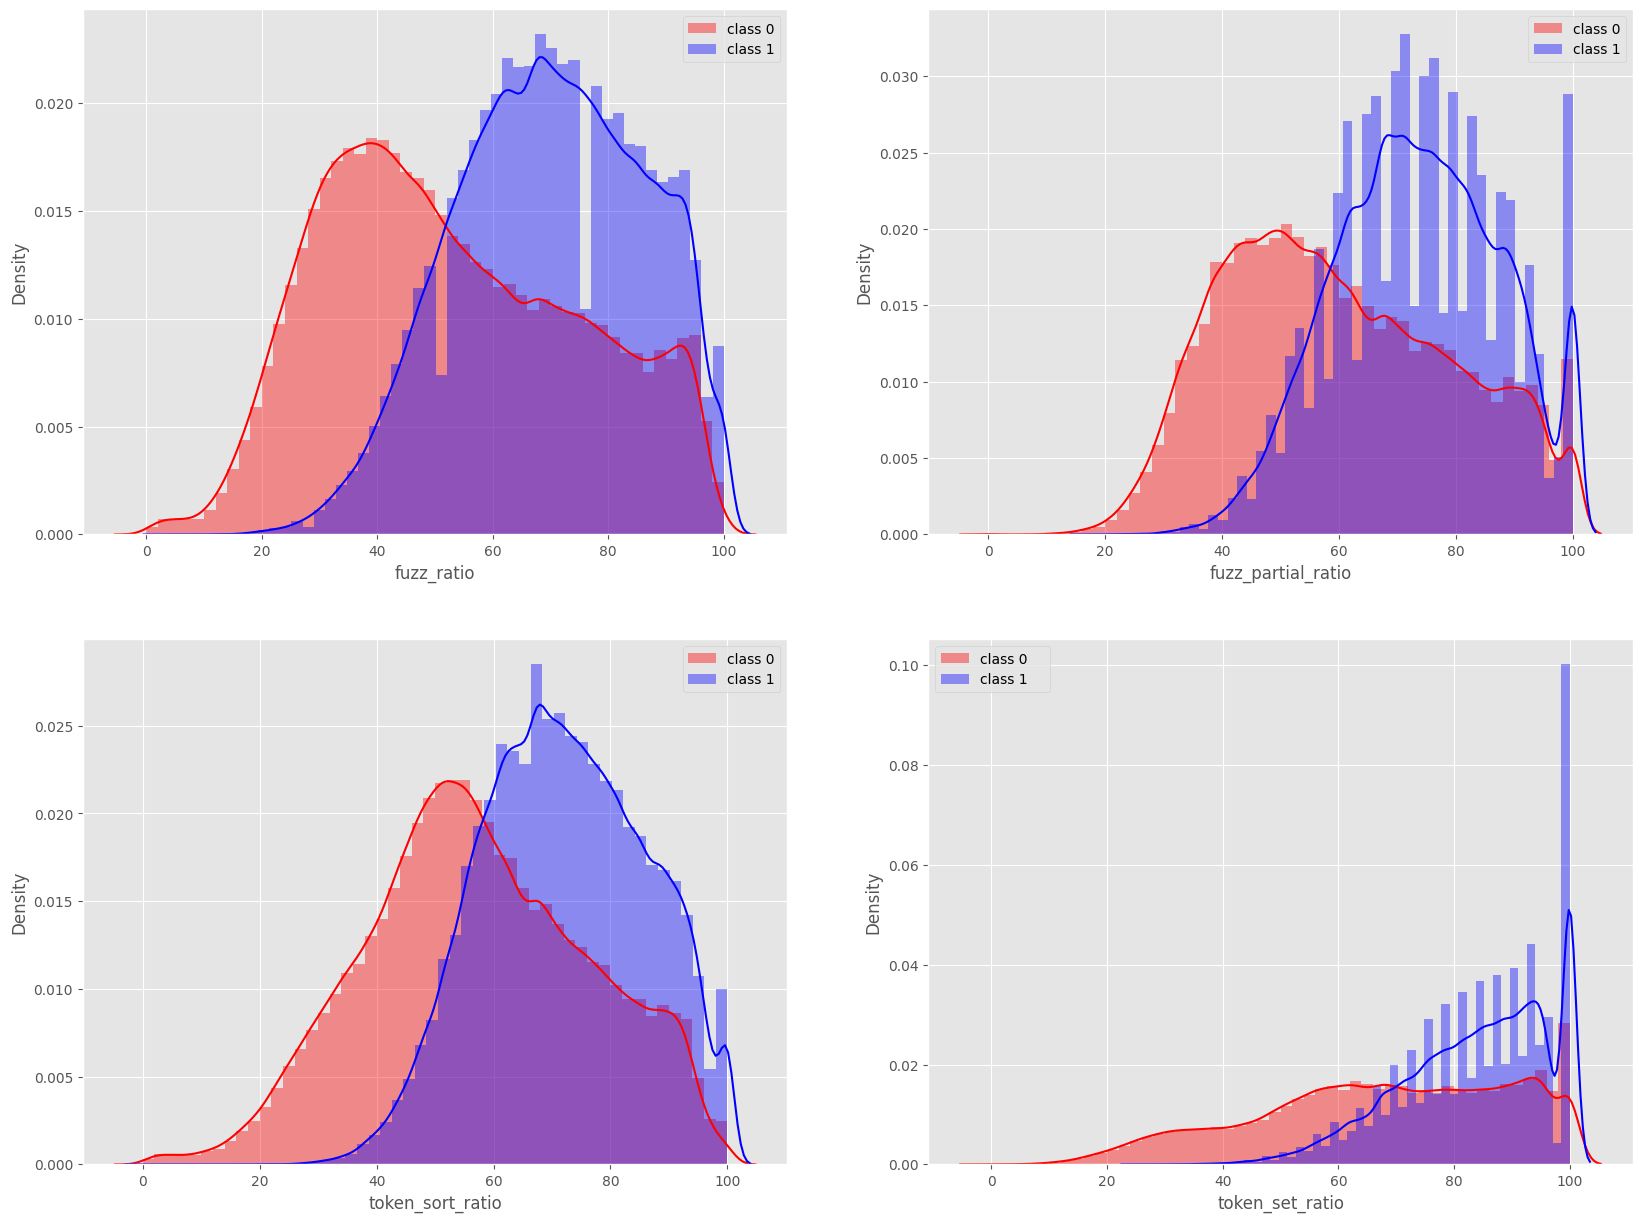

In [40]:
plt.figure(figsize=(20,15))


plt.subplot(2,2,1)
sns.distplot(df[df.is_duplicate==0]['fuzz_ratio'],color='red',label='class 0')
sns.distplot(df[df.is_duplicate==1]['fuzz_ratio'],color='blue',label='class 1')
plt.legend()

plt.subplot(2,2,2)
sns.distplot(df[df.is_duplicate==0]['fuzz_partial_ratio'],color='red',label='class 0')
sns.distplot(df[df.is_duplicate==1]['fuzz_partial_ratio'],color='blue',label='class 1')
plt.legend()

plt.subplot(2,2,3)
sns.distplot(df[df.is_duplicate==0]['token_sort_ratio'],color='red',label='class 0')
sns.distplot(df[df.is_duplicate==1]['token_sort_ratio'],color='blue',label='class 1')
plt.legend()

plt.subplot(2,2,4)
sns.distplot(df[df.is_duplicate==0]['token_set_ratio'],color='red',label='class 0')
sns.distplot(df[df.is_duplicate==1]['token_set_ratio'],color='blue',label='class 1    ')
plt.legend()


plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
questions= list(df['question1'])+list(df['question2'])

tfidf=TfidfVectorizer(lowercase=False)
tfidf.fit_transform(questions)

word_to_tfidf=dict(zip(tfidf.get_feature_names_out(),tfidf.idf_))

In [34]:
word_to_tfidf

{'00': 10.671203085351102,
 '000': 12.038079360613892,
 '0000': 12.811269248847374,
 '0000000': 13.909881537515483,
 '00000000': 13.909881537515483,
 '0000000000': 13.50441642940732,
 '00000074': 13.909881537515483,
 '0000021210': 13.909881537515483,
 '00001': 13.909881537515483,
 '00002359': 13.909881537515483,
 '00008090100': 13.909881537515483,
 '0002': 13.50441642940732,
 '00035': 13.909881537515483,
 '0008': 13.909881537515483,
 '000v': 13.909881537515483,
 '000webhost': 13.909881537515483,
 '000webhostcom': 13.909881537515483,
 '001': 12.038079360613892,
 '00113': 13.909881537515483,
 '0012': 13.909881537515483,
 '0015': 13.909881537515483,
 '0019': 13.50441642940732,
 '001gbp': 13.909881537515483,
 '002': 12.993590805641327,
 '0020': 13.909881537515483,
 '0021': 13.909881537515483,
 '0025': 13.909881537515483,
 '003': 13.50441642940732,
 '0038': 13.909881537515483,
 '004': 13.216734356955538,
 '005': 12.811269248847374,
 '005246': 13.909881537515483,
 '00569': 13.909881537515483

In [35]:
!pip install spacy
!python -m spacy download en_core_web_lg


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/usr/lib/python3.10/socket.py", line 955, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno -3] Temporary failure in name resolution

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 490, in _make_request
    raise new_e
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 466

In [36]:
import spacy
nlp = spacy.load("en_core_web_sm")
print(len(nlp("sweet").vector))  # This may return 0 (since sm model lacks word vectors)


96


In [37]:
def get_weighted_vectors(data,column):
    vectors=[]
    for sentence in tqdm(list(data[column])):
        doc=nlp(sentence)
        mean_vector=np.zeros([len(doc),96])
        for word in doc:
            vec=word.vector
            try:
                idf=word_to_tfidf[str(word)]
            except:
                idf=0
            mean_vector += vec*idf
        mean_vector=mean_vector.mean(axis=0)
        vectors.append(mean_vector)
    return(list(vectors))



In [38]:
%%time
df['q1_vectors']=get_weighted_vectors(df,'question1')  

100%|██████████| 404287/404287 [37:59<00:00, 177.36it/s]


CPU times: user 38min, sys: 9.52 s, total: 38min 9s
Wall time: 37min 59s


In [39]:
%%time
df['q2_vectors']=get_weighted_vectors(df,'question2')

100%|██████████| 404287/404287 [37:55<00:00, 177.71it/s]

CPU times: user 37min 56s, sys: 9.22 s, total: 38min 5s
Wall time: 37min 55s


In [40]:
print("Shape of the data is ",df.shape)
df.head()

Shape of the data is  (404287, 31)


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,words_common,words_total,words_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_diff,mean_length,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,q1_vectors,q2_vectors
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,1,1,66,57,14,12,10,23,0.434783,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0,1,2,13.0,92,100,92,100,"[32.85504150390625, -37.50945623219013, 0.5333...","[26.909921169281006, -36.24204580485821, -3.42..."
1,1,3,4,what is the stori of kohinoor kohinoor diamond,what would happen if the indian govern stole t...,0,4,1,51,88,8,13,4,20,0.200000,0.666644,0.333328,0.499988,0.399992,0.499994,0.307690,0,1,-5,10.5,66,70,64,81,"[12.71191480755806, -20.34283160418272, -12.52...","[-1.5223758220672607, -53.917957454919815, -6...."
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,1,1,73,59,14,10,3,24,0.125000,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,0,1,4,12.0,41,38,64,73,"[-8.178779244422913, -29.950729854404926, -2.2...","[14.533539980649948, -16.752487645484507, -17...."
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math2324math is divid by...,0,1,1,50,65,11,9,0,19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2,10.0,21,26,28,28,"[-14.11522275954485, -24.045862168073654, -0.4...","[-15.815867403522134, -29.73078102245927, -12...."
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,3,1,76,39,13,7,2,20,0.100000,0.499988,0.222220,0.666644,0.499988,0.571420,0.307690,0,1,6,10.0,36,54,49,68,"[-10.012471437454224, -67.88377845287323, 26.6...","[-11.534804165363312, -37.148023426532745, 5.5..."


In [41]:
df=pd.concat((df.reset_index(),pd.DataFrame(list(df['q1_vectors']))),axis=1)
df=pd.concat((df,pd.DataFrame(list(df['q2_vectors']))),axis=1)

In [42]:
print("Shape of dataframe is ",df.shape)
df.head()

Shape of dataframe is  (404287, 224)


,index,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,words_common,words_total,words_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_diff,mean_length,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,q1_vectors,q2_vectors,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,1,1,66,57,14,12,10,23,0.434783,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0,1,2,13.0,92,100,92,100,"[32.85504150390625, -37.50945623219013, 0.5333...","[26.909921169281006, -36.24204580485821, -3.42...",32.855042,-37.509456,0.533394,-19.520611,0.044400,-9.086334,29.902156,24.450812,4.462961,6.145260,-4.417647,-15.903369,-36.003659,0.346725,11.533750,0.374507,-15.002720,-14.043900,5.674812,9.707619,15.640071,33.210511,-48.923208,-7.048217,12.482637,-23.084414,19.857084,25.486043,-17.584579,6.544641,-26.902201,13.854253,13.248886,0.683690,19.103082,-14.050140,42.438118,29.190088,4.371336,-13.592595,-44.935664,9.068055,1.875401,16.753626,6.173791,-5.561413,-7.417592,7.043691,7.946226,-11.835861,-33.987756,-26.469439,15.193704,-44.624743,-37.856076,6.724834,-27.758227,-5.804109,-5.255075,-33.572747,-17.444089,1.067149,-21.432868,-23.712839,7.861169,-15.224428,24.932329,2.272637,24.829702,19.753513,22.120966,16.523921,30.322809,-10.260520,-16.630519,-13.198633,-36.414375,-16.226573,2.434808,-17.212202,-6.856012,12.722532,-22.459028,-4.428269,8.102320,3.481160,7.487574,-25.952941,-40.983359,23.697899,-16.029046,10.480015,25.266200,77.489114,-1.944012,20.313203,26.909921,-36.242046,-3.421585,-20.494319,-3.909573,-6.887613,24.378841,27.946179,-0.466424,7.687527,-15.361799,-10.996382,-28.847994,5.857962,13.685427,6.417686,-9.480743,-21.819449,5.024234,11.705514,21.945073,35.080438,-43.318114,-6.374693,7.728197,-21.776197,13.867251,22.601263,-13.706822,4.494076,-25.796987,12.288537,3.614281,-4.707635,17.403194,-13.579067,33.583191,19.634889,9.687858,-8.124945,-38.746284,13.545505,3.964559,20.567479,11.459950,-6.366561,-7.444696,2.779808,10.730851,-12.508208,-28.767791,-18.399578,16.919868,-43.489710,-27.047833,8.993114,-27.086261,-5.032505,-4.368775,-28.111468,-12.540213,12.880920,-21.172243,-22.238394,14.445284,-14.558301,21.352105,0.689967,17.603417,18.014352,15.434131,11.515465,22.288367,-9.460986,-21.214685,-13.989052,-30.249275,-16.265479,4.939740,-15.274801,-8.483541,11.252968,-22.438412,-2.670679,5.111161,4.314927,10.674397,-25.423734,-37.974440,20.387979,-13.636968,6.540055,14.934214,73.480184,-0.883140,11.607855
1,1,1,3,4,what is the stori of kohinoor kohinoor diamond,what would happen if the indian govern stole t...,0,4,1,51,88,8,13,4,20,0.200000,0.666644,0.333328,0.499988,0.399992,0.499994,0.307690,0,1,-5,10.5,66,70,64,81,"[12.71191480755806, -20.34283160418272, -12.52...","[-1.5223758220672607, -53.917957454919815, -6....",12.711915,-20.342832,-12.523781,13.716903,-16.375203,-2.443087,26.835219,14.640505,13.396729,-14.670527,6.360635,1.433033,-12.420245,-0.130915,-18.824563,8.450616,-9.140007,-25.151128,-9.451501,-9.713669,-24.978166,9.906955,-29.285221,-7.742261,10.378805,-33.208773,24.290964,-1.548885,33.302962,21.235864,7.746378,13.949663,-4.184671,-1.320090,12.498604,-8.851649,11.457391,22.789317,-8.741053,-21.596629,-37.275716,13.290855,-13.470171,25.095844,5.766683,-3.649542,-39.125573,5.622669,8.128499,13.146352,-51.836432,30.700456,

In [43]:
 df.isnull().sum()

index        0
id           0
qid1         0
qid2         0
question1    0
            ..
91           2
92           2
93           2
94           2
95           2
Length: 224, dtype: int64

In [44]:
df.dropna(inplace=True)


****Model Evaluation****

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


*****There are few columns which is unnecessary for our machine learning algorithm, So lets drop them*****

In [47]:
df=df.drop(["index","id","qid1","qid2","question1","question2","q1_vectors","q2_vectors"],axis=1)

In [48]:
df.columns

Index(['is_duplicate',    'freq_qid1',    'freq_qid2',        'q1len',
              'q2len',   'q1_n_words',   'q2_n_words', 'words_common',
        'words_total',  'words_share',
       ...
                   86,             87,             88,             89,
                   90,             91,             92,             93,
                   94,             95],
      dtype='object', length=216)

****Splitting the data in independent variable(x) and Target variable(y)****

In [49]:
x=df.drop("is_duplicate",axis=1)
y=df["is_duplicate"]

print(x.shape)
print(y.shape)

(404273, 215)
(404273,)


****Splitting the data into training and testing part****

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [51]:
x_train.columns=x_train.columns.astype(str)
x_test.columns=x_test.columns.astype(str)

****Scaling of Data****

In [52]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

# Logistic Regression Model

In [53]:
model1_lr=LogisticRegression()


In [54]:
model1_lr.fit(x_train,y_train)



LogisticRegression()

In [55]:
y_pred=model1_lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7745222929936306

In [57]:
from sklearn.metrics import accuracy_score

# Predict on the training set
y_train_pred = model1_lr.predict(x_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(train_accuracy)

0.7744281394356529


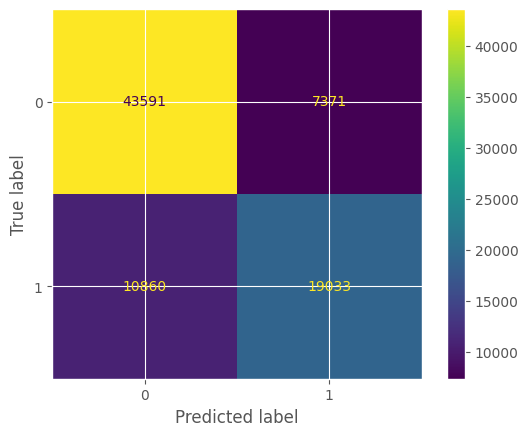

In [58]:
metrics.ConfusionMatrixDisplay.from_estimator(model1_lr,x_test,y_test)

In [59]:
fpr,tpr,threshold=metrics.roc_curve(y_test,model1_lr.predict_proba(x_test)[::,1])

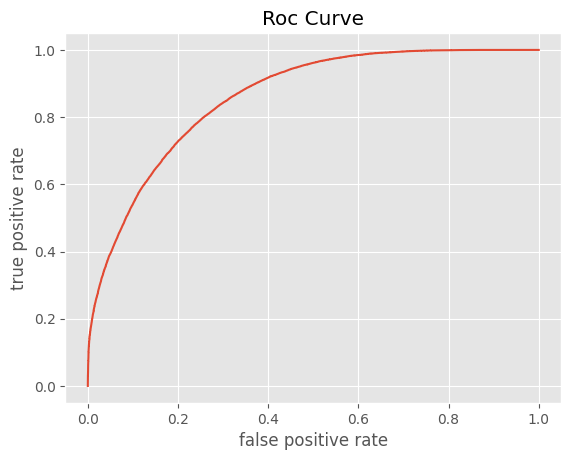

In [60]:
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Roc Curve")
plt.show()


In [61]:
a=metrics.roc_auc_score(y_test,model1_lr.predict_proba(x_test)[::,1])
print("Auc score is ",a)

Auc score is  0.8593746512135451


# Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB

model2_gnb = GaussianNB()
model2_gnb.fit(x_train, y_train)



GaussianNB()

In [119]:
y_pred1=model2_gnb.predict(x_test)
y_pred1

array([1, 0, 0, ..., 0, 1, 1])

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.6426071362315255

In [121]:
from sklearn.metrics import accuracy_score

# Predict on the training set
y_train_pred = model2_gnb.predict(x_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(train_accuracy)

0.6404745561471532


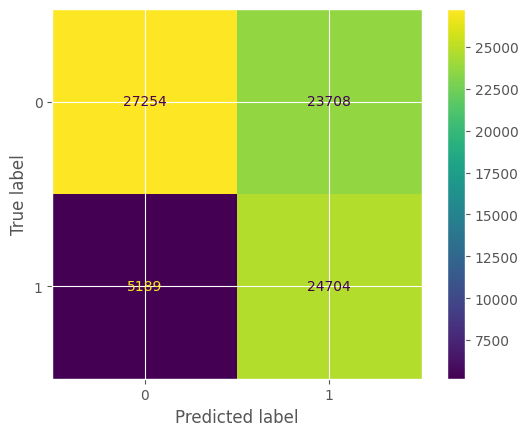

In [122]:
metrics.ConfusionMatrixDisplay.from_estimator(model2_gnb,x_test,y_test)

In [123]:
fpr,tpr,threshold=metrics.roc_curve(y_test,model2_gnb.predict_proba(x_test)[::,1])

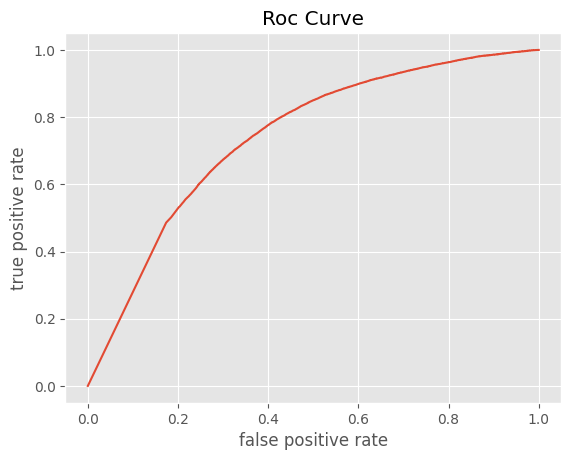

In [124]:
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Roc Curve")
plt.show()


In [125]:
a=metrics.roc_auc_score(y_test,model2_gnb.predict_proba(x_test)[::,1])
print("Auc score is ",a)

Auc score is  0.7413176531767511


# Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
model3_rf = RandomForestClassifier(n_estimators=50, max_features='sqrt', random_state=42)


In [128]:
model3_rf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [129]:
y_pred3=model3_rf.predict(x_test)
y_pred3

array([0, 0, 0, ..., 1, 1, 0])

In [130]:

accuracy_score(y_test, y_pred3)

0.8338136169686475

In [131]:
from sklearn.metrics import accuracy_score

# Predict on the training set
y_train_pred = model3_rf.predict(x_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(train_accuracy)

0.9999536203921859


In [132]:
fpr,tpr,threshold=metrics.roc_curve(y_test,model3_rf.predict_proba(x_test)[::,1])

In [133]:
a=metrics.roc_auc_score(y_test,model3_rf.predict_proba(x_test)[::,1])
print("Auc score is ",a)

Auc score is  0.9181993219138711


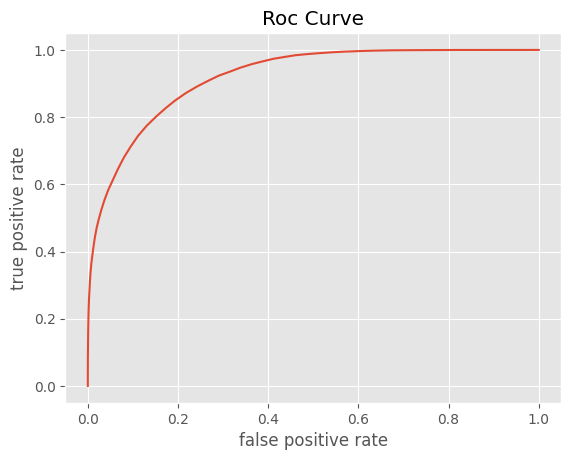

In [134]:
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Roc Curve")
plt.show()

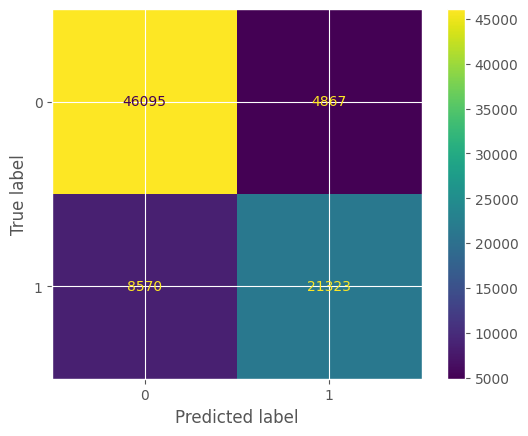

In [135]:
metrics.ConfusionMatrixDisplay.from_estimator(model3_rf,x_test,y_test)

# XGBOOST

In [62]:
from xgboost import XGBClassifier

In [63]:
xgb=XGBClassifier()


In [64]:
xgb.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
print("Accuracy score of XGB base model is ",xgb.score(x_test,y_test))

Accuracy score of XGB base model is  0.8382289283284893


In [66]:
from sklearn.metrics import accuracy_score

# Predict on the training set
y_train_pred = xgb.predict(x_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(train_accuracy)

0.8676109554817605


In [67]:
 #making final_model
 xgb=XGBClassifier(n_estimators=50,max_depth=5,eta=0.2,subsample=0.5)
 xgb.fit(x_train,y_train)
 y_pred_prob=xgb.predict_proba(x_test)

In [68]:
print("Accuracy score of final model is :",xgb.score(x_test,y_test))

Accuracy score of final model is : 0.8295590872549626


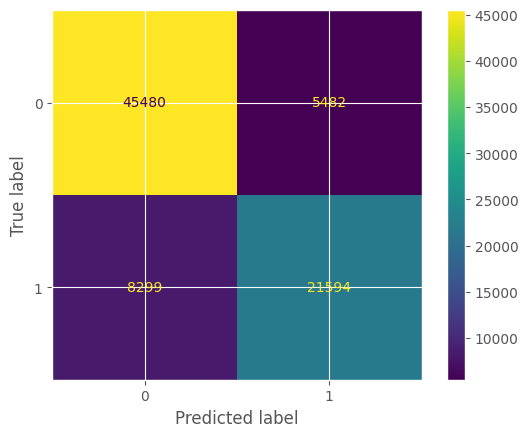

In [69]:
 metrics.ConfusionMatrixDisplay.from_estimator(xgb,x_test,y_test)


In [70]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred_prob[::,1])

In [71]:
a=metrics.roc_auc_score(y_test,xgb.predict_proba(x_test)[::,1])
print("Auc score is ",a)

Auc score is  0.9157300665953456


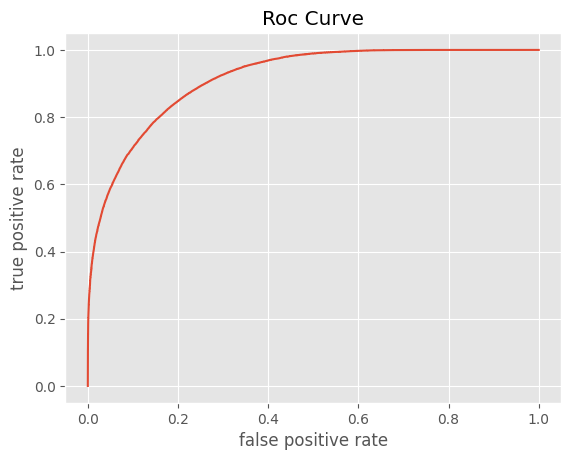

In [72]:
 plt.plot(fpr,tpr)
 plt.xlabel("false positive rate")
 plt.ylabel("true positive rate")
 plt.title("Roc Curve")
 plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost']
accuracies = [77, 64, 83,83]

# Plotting the bar chart
plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'brown'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)  # Setting limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc}%", ha='center', fontsize=12)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost']

# Accuracy and AUC values
accuracies = [77, 64, 83,83]
aucs = [85, 74, 91,91]

# X-axis positions
x = np.arange(len(models))  
width = 0.35  # Width of the bars

# Plotting the grouped bars
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='blue')
bars2 = ax.bar(x + width/2, aucs, width, label='AUC', color='orange')

# Labels and Title
ax.set_xlabel('Models')
ax.set_ylabel('Percentage (%)')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height}%", 
                ha='center', fontsize=12)

# Show plot
plt.ylim(0, 100)  # Setting limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost']

# Accuracy values
test_accuracies = [77, 64, 83, 83]
train_accuracies = [77, 64, 99, 86]

# X-axis positions
x = np.arange(len(models))  
width = 0.35  # Width of the bars

# Plotting the grouped bars
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, test_accuracies, width, label='Testing Accuracy', color='blue')
bars2 = ax.bar(x + width/2, train_accuracies, width, label='Training Accuracy', color='orange')

# Labels and Title
ax.set_xlabel('Models')
ax.set_ylabel('Percentage (%)')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height}%", 
                ha='center', fontsize=12)

# Show plot
plt.ylim(0, 110)  # Increased limit slightly for better text display
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost']

# Accuracy and AUC values
test_accuracies = [77, 64, 83, 83]
train_accuracies = [77, 64, 99, 86]
auc_scores = [85, 73, 91, 91]

# X-axis positions
x = np.arange(len(models))  
width = 0.2  # Bar width

# Plotting the grouped bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, test_accuracies, width, label='Testing Accuracy', color='blue')
bars2 = ax.bar(x, train_accuracies, width, label='Training Accuracy', color='orange')
bars3 = ax.bar(x + width, auc_scores, width, label='AUC Score', color='green')

# Labels and Title
ax.set_xlabel('Models')
ax.set_ylabel('Percentage (%)')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height}%", 
                ha='center', fontsize=11)

# Decrease y-axis limit to make bars visually taller
plt.ylim(0, 120)  # Previously 110, now tighter
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [101]:
def query_point_creator(q1, q2):
    import numpy as np
    import re
    import string
    from fuzzywuzzy import fuzz
    from nltk.stem import PorterStemmer
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    import spacy

    # Load your existing items
    ps = PorterStemmer()
    stopword = list(ENGLISH_STOP_WORDS)
    nlp = spacy.load("en_core_web_sm")  # must use _lg for vectors
    

    # --- contraction map ---
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }  # Insert your full CONTRACTION_MAP here

    # --- helper functions ---
    def contract_expand(text):
        new_text = ""
        text = text.lower()
        for word in text.split():
            if word in CONTRACTION_MAP:
                new_text += CONTRACTION_MAP[word] + " "
            else:
                new_text += word + " "
        return new_text

    def remove_punctuation_and_links(text):
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        return text

    def stem(text):
        tokens = text.split()
        token_stemmed = [ps.stem(word) for word in tokens]
        return " ".join(token_stemmed)

    def preprocess_text(text):
        text = contract_expand(text)
        text = remove_punctuation_and_links(text)
        text = stem(text)
        return text

    def words_common(a, b):
        return len(set(a.split()) & set(b.split()))

    def total_words(a, b):
        return len(set(a.split()) | set(b.split()))

    def get_token_features(q1, q2):
        features = [0]*10
        q1_tokens = q1.split()
        q2_tokens = q2.split()
        if not q1_tokens or not q2_tokens:
            return features
        q1_words = set([word for word in q1_tokens if word not in stopword])
        q2_words = set([word for word in q2_tokens if word not in stopword])
        q1_sw = set([word for word in q1_tokens if word in stopword])
        q2_sw = set([word for word in q2_tokens if word in stopword])
        features[0] = len(q1_words & q2_words) / (min(len(q1_words), len(q2_words)) + 0.0001)
        features[1] = len(q1_words & q2_words) / (max(len(q1_words), len(q2_words)) + 0.0001)
        features[2] = len(q1_sw & q2_sw) / (min(len(q1_sw), len(q2_sw)) + 0.0001)
        features[3] = len(q1_sw & q2_sw) / (max(len(q1_sw), len(q2_sw)) + 0.0001)
        features[4] = len(set(q1_tokens) & set(q2_tokens)) / (min(len(q1_tokens), len(q2_tokens)) + 0.0001)
        features[5] = len(set(q1_tokens) & set(q2_tokens)) / (max(len(q1_tokens), len(q2_tokens)) + 0.0001)
        features[6] = int(q1_tokens[-1] == q2_tokens[-1])
        features[7] = int(q1_tokens[0] == q2_tokens[0])
        features[8] = len(q1_tokens) - len(q2_tokens)
        features[9] = (len(q1_tokens) + len(q2_tokens)) / 2
        return features

    def get_fuzzy_features(q1, q2):
        return [
            fuzz.QRatio(q1, q2),
            fuzz.partial_ratio(q1, q2),
            fuzz.token_sort_ratio(q1, q2),
            fuzz.token_set_ratio(q1, q2),
        ]

    def get_weighted_vector(text, word_to_tfidf):
        doc = nlp(text)
        mean_vector = np.zeros((96,))  # change from (300,) to (96,) for sm model
        total_weight = 0.0

        for word in doc:
            vec = word.vector
            if vec is not None and vec.shape[0] == 96:
                idf = word_to_tfidf.get(str(word), 0)
                mean_vector += vec * idf
                total_weight += idf

        if total_weight != 0:
            mean_vector = mean_vector / total_weight

        return mean_vector



     


    # --- Start processing input ---
    q1 = preprocess_text(q1)
    q2 = preprocess_text(q2)

    # Basic features
        # Basic features
    features = []
    features.append(len(q1))                            # 1
    features.append(len(q2))                            # 2
    features.append(len(q1.split()))                    # 3
    features.append(len(q2.split()))                    # 4
    features.append(words_common(q1, q2))               # 5
    features.append(total_words(q1, q2))                # 6
    features.append(words_common(q1, q2) / 
                    (total_words(q1, q2) + 0.0001))     # 7
    features.append(abs(len(q1) - len(q2)))             # 8
    features.append((len(q1) + len(q2)) / 2)            # 9

    # Token features (10)
    features.extend(get_token_features(q1, q2))         # +10 → 19

    # Fuzzy features (4)
    features.extend(get_fuzzy_features(q1, q2))         # +4 → 23


    
    
    # Add TF-IDF weighted vectors

    
    q1_vec = get_weighted_vector(q1, word_to_tfidf)
    q2_vec = get_weighted_vector(q2, word_to_tfidf)

    # Final input shape
    #final_vector = np.hstack((np.array(features), q1_vec, q2_vec))
   # final_vector = scaler.transform(final_vector.reshape(1, -1))

    final_vector = np.hstack((np.array(features), q1_vec, q2_vec))

    assert final_vector.shape[0] == scaler.n_features_in_, (
        f"Feature mismatch: got {final_vector.shape[0]}, expected {scaler.n_features_in_}"
)

    final_vector = scaler.transform(final_vector.reshape(1, -1))

    
    
    # Scale it
    
    return final_vector


In [117]:
# Testing

In [102]:
# Example input
q1 = "How can I be a good data scientist?"
q2 = "What skills do I need to become a great data scientist?"

# Predict
prediction = xgb.predict(query_point_creator(q1, q2))
print("Prediction:", prediction[0])


Prediction: 1


In [103]:
q1 = "Where is the capital of India?"
q2 = "What is the business capital of India"

# Predict
prediction = xgb.predict(query_point_creator(q1, q2))
print("Prediction:", prediction[0])

Prediction: 1


In [106]:
q1 = "What is the best way to learn a new language?"
q2 = "What are the most effective methods for language acquisition"

# Predict
prediction = xgb.predict(query_point_creator(q1, q2))
print("Prediction:", prediction[0])

Prediction: 1


In [107]:
q1 = "What are some unique and interesting ways to learn a new language?"
q2 = "If you could have any superpower, what would it be and how would you use it?"

# Predict
prediction = xgb.predict(query_point_creator(q1, q2))
print("Prediction:", prediction[0])

Prediction: 0


In [171]:
q1 = "Where is my school notebook?"
q2 = "If you are a good student then doing your homework is a good thing "

# Predict
prediction = xgb.predict(query_point_creator(q1, q2))
print("Prediction:", prediction[0])

Prediction: 0


In [138]:
q1 = "What does it mean that every time I look at the clock the numbers are the same?"
q2 = "How many times a day do a clock’s hands overlap?"

# Predict
prediction = model3_rf.predict(query_point_creator(q1, q2))
print("Prediction:", prediction[0])

Prediction: 0


In [140]:
q1 = "What is application?"
q2 = "What is web application framework?"

# Predict
prediction = model3_rf.predict(query_point_creator(q1, q2))
print("Prediction:", prediction[0])

Prediction: 0


In [145]:
q1 = "What is applications?"
q2 = "What is mean by applications?"

# Predict
prediction = model3_rf.predict(query_point_creator(q1, q2))
print("Prediction:", prediction[0])

Prediction: 1


In [172]:
import pickle


pickle.dump(xgb, open('model.pkl', 'wb'))

pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
